In [1]:
import sys
sys.path.append('../../')
import operator
import json
import os
import numpy as np
from utils import utils
json_file = "../../gtex_v8_metadata.json"
tissue_file = "/usr/users/fsimone/trans-eqtl-pipeline/analysis/plots/tissue_table.txt"
tshorts, tfulls_plain = utils.read_tissues(tissue_file, plain=True)
_, tfulls = utils.read_tissues(tissue_file)
with open(json_file) as instream:
    gtex_meta = json.load(instream)
tissue_colors  = dict()
tissue_names   = dict()
tissue_samples = dict()
for tshort, tfull in zip(tshorts, tfulls_plain):
    tissue_names[tshort] = tfull
for tshort, tfull in zip(tshorts, tfulls):
    tissue_colors[tshort] = "#" + gtex_meta[tfull.replace(" ", "_")]["colorHex"]
    tissue_samples[tshort] = gtex_meta[tfull.replace(" ", "_")]["rnaSeqAndGenotypeSampleCount"]

brain_tissues = ['bam','ban','bca','bceh','bce','bco','bfr','bhi','bhy','bnu','bpu','bsp','bsu']                 

In [2]:
import collections 
import re
import copy

DHSINFO_FIELDS = ['tissue', 'neqtl', 'ndhs', 'enrichment', 'pval']
class DhsInfo(collections.namedtuple('_DhsInfo', DHSINFO_FIELDS)):
    __slots__ = ()
    
CISINFO_FIELDS = ['tissue', 'ncis', 'ntrans', 'ncistrans', 'enrichment', 'pval']
class CisInfo(collections.namedtuple('_CisInfo', CISINFO_FIELDS)):
    __slots__ = ()

def read_cis_enrichments(filepath):
    res = dict()
    res2 = collections.defaultdict(dict)
    with open(filepath) as instream:
        for line in instream:
            if re.match("tissue", line):
                continue
            arr = line.strip().split("\t")
            tissue = arr[0]
            ncis   = int(arr[1])
            ntrans = int(arr[2])
            ncistrans  = int(arr[3])
            # randfrac = float(arr[4])
            enrich = float(arr[5])
            enrichment = np.log2(enrich) if enrich > 0 else 0.0
            pval = float(arr[6])
            res[tissue] = CisInfo(tissue=tissue, ncis=ncis, ntrans=ntrans, ncistrans=ncistrans, enrichment=enrichment, pval=pval)
            res2[tissue]['ncis'] = ncis
            res2[tissue]['ntrans'] = ntrans
            res2[tissue]['ncistrans']  = ncistrans
            res2[tissue]['enrichment'] = enrichment
            res2[tissue]['pval'] = pval
    return res, res2
    
def read_enrichments(filepath, ndhs_limit = 0):
    res = dict()
    res2 = collections.defaultdict(dict)
    with open(filepath) as instream:
        for line in instream:
            if re.match("tissue", line):
                continue
            arr = line.strip().split("\t")
            tissue = arr[0]
            neqtl = int(arr[3])
            ndhs  = int(arr[4])
            enrich = float(arr[5])
            enrichment = np.log2(enrich) if enrich > 0 else 0.0
            pval = float(arr[6])
            if ndhs > ndhs_limit:
                res[tissue] = DhsInfo(tissue=tissue, neqtl=neqtl, ndhs=ndhs, enrichment=enrichment, pval=pval)
                res2[tissue]['neqtl'] = neqtl
                res2[tissue]['ndhs']  = ndhs
                res2[tissue]['enrichment'] = enrichment
                res2[tissue]['pval'] = pval
            else:
                res[tissue] = DhsInfo(tissue=tissue, neqtl=neqtl, ndhs=ndhs, enrichment=0.0, pval=1.0)
                res2[tissue]['neqtl'] = neqtl
                res2[tissue]['ndhs']  = ndhs
                res2[tissue]['enrichment'] = 0.0
                res2[tissue]['pval'] = 1.0
    return res, res2

def read_enrichments_new(filepath, ndhs_limit = 0):
    res = dict()
    res2 = collections.defaultdict(dict)
    with open(filepath) as instream:
        for line in instream:
            if re.match("tissue", line):
                continue
            arr = line.strip().split("\t")
            tissue = arr[0]
            neqtl = int(arr[2])
            ndhs  = int(arr[3])
            enrich = float(arr[4])
            enrichment = np.log2(enrich) if enrich > 0 else 0.0
            pval = float(arr[5])
            if ndhs > ndhs_limit:
                res[tissue] = DhsInfo(tissue=tissue, neqtl=neqtl, ndhs=ndhs, enrichment=enrichment, pval=pval)
                res2[tissue]['neqtl'] = neqtl
                res2[tissue]['ndhs']  = ndhs
                res2[tissue]['enrichment'] = enrichment
                res2[tissue]['pval'] = pval
            else:
                res[tissue] = DhsInfo(tissue=tissue, neqtl=neqtl, ndhs=ndhs, enrichment=0.0, pval=1.0)
                res2[tissue]['neqtl'] = neqtl
                res2[tissue]['ndhs']  = ndhs
                res2[tissue]['enrichment'] = 0.0
                res2[tissue]['pval'] = 1.0
    return res, res2

def read_enrichments_new_less(filepath, ndhs_limit = 0):
    res = dict()
    res2 = collections.defaultdict(dict)
    with open(filepath) as instream:
        for line in instream:
            if re.match("tissue", line):
                continue
            arr = line.strip().split("\t")
            tissue = arr[0]
            neqtl = int(arr[1])
            ndhs  = int(arr[2])
            enrich = float(arr[3])
            enrichment = np.log2(enrich) if enrich > 0 else 0.0
            pval = float(arr[4])
            if ndhs > ndhs_limit:
                res[tissue] = DhsInfo(tissue=tissue, neqtl=neqtl, ndhs=ndhs, enrichment=enrichment, pval=pval)
                res2[tissue]['neqtl'] = neqtl
                res2[tissue]['ndhs']  = ndhs
                res2[tissue]['enrichment'] = enrichment
                res2[tissue]['pval'] = pval
            else:
                res[tissue] = DhsInfo(tissue=tissue, neqtl=neqtl, ndhs=ndhs, enrichment=0.0, pval=1.0)
                res2[tissue]['neqtl'] = neqtl
                res2[tissue]['ndhs']  = ndhs
                res2[tissue]['enrichment'] = 0.0
                res2[tissue]['pval'] = 1.0
    return res, res2

basedir = "/cbscratch/franco/trans-eqtl/"
path1   = basedir+"protein_coding_lncRNA_gamma01_knn30_cut5e-8/"
path2   = basedir+"dev-pipeline/gtex_v8_SHAPEIT2/raw/summary_5e-08/"

target_file = "dhs_enrichment_multi_tissue_5e-08.txt.ld_prune"

res_dhs, res_dhs_dict             = read_enrichments_new(os.path.join(path1, "dhs_enrichments/dhs_enrichment_multi_tissue_pc_lncRNA_gamma01_knn30_cut5e-8_ldpruned.txt"))  # uses saikat's format
res_dhs_nocis, res_dhs_nocis_dict = read_enrichments_new_less(os.path.join(path2,"dhs_enrichments/permnull_sb0.1_knn30_nocismask", target_file))

res_cis, res_cis_dict             = read_cis_enrichments(os.path.join(path1, "GTExPortal_eqtl_analysis/ciseqtl_enrichment_pc_lncRNA_gamma01_knn30_cut5e-8_ldpruned.txt"))
res_cis_nocis, res_cis_nocis_dict = read_cis_enrichments(os.path.join(path2, "GTExPortal_eqtl_analysis/permnull_sb0.1_knn30_nocismask/ciseqtl_enrichment.txt.ld_prune"))

In [3]:
results_dict = collections.defaultdict(dict)
results_dict['dhs']["ph"] = res_dhs_dict
results_dict['dhs']["ph_nocis"] = res_dhs_nocis_dict
results_dict['cis']["ph"] = res_cis_dict
results_dict['cis']["ph_nocis"] = res_cis_nocis_dict

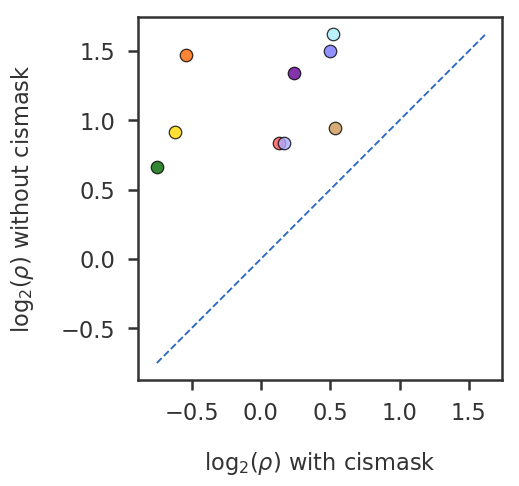

In [73]:
import matplotlib.pyplot as plt
from utils import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 18, colors = 'banskt', dpi = 90)

res1 = copy.copy(res_cis)
res2 = copy.copy(res_cis_nocis)

res3 = copy.copy(res_dhs)
res4 = copy.copy(res_dhs_nocis)

neqtl1 = []
neqtl2 = []
ts_indata = list()
for ts in tshorts:
    if ts not in brain_tissues:
        if ts not in res2 or ts not in res4: # if ts not in res1 and ts not in res2:
            # print(f"{ts} not in dataset")
            continue
        else:
            neqtl1.append(np.log10(res1[ts].ntrans) if ts in res1 else 0)
            neqtl2.append(np.log10(res2[ts].ntrans) if ts in res2 else 0)
            ts_indata.append(ts)

cis_enrich1 = []  
cis_enrich2 = []
dhs_enrich1 = []  
dhs_enrich2 = []
ts_color = dict()
ed_color = dict()
ts_alpha = dict()
pval_c = 1
for ts in ts_indata:
    if ts not in brain_tissues:
        ts_color[ts] = tissue_colors[ts]
        ts_alpha[ts] = 0.9
        ed_color[ts] = "face"
        cis_enrich1.append(res1[ts].enrichment if ts in res1 and res1[ts].pval < pval_c else 0)
        cis_enrich2.append(res2[ts].enrichment if ts in res2 and res2[ts].pval < pval_c else 0)
        
        dhs_enrich1.append(res3[ts].enrichment if ts in res3 and res3[ts].pval < pval_c else 0)
        dhs_enrich2.append(res4[ts].enrichment if ts in res4 and res4[ts].pval < pval_c else 0)
    
fig = plt.figure(figsize=(6,6))
# ax1 = fig.add_subplot(131)
# for i, ts in enumerate(ts_indata):
#     ax1.scatter(neqtl1[i], neqtl2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
# ax1.plot([0,max(neqtl1+ neqtl2)],[0,max(neqtl1+ neqtl2)], linestyle="--")
# ax1.set_xlabel("log10 # eQTLS ")
# ax1.set_ylabel("log10 # eQTLS \n NO cismask")


ax2 = fig.add_subplot(111)
for i, ts in enumerate(ts_indata):
    ax2.scatter(cis_enrich1[i], cis_enrich2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax2.plot([min(cis_enrich1+cis_enrich2),max(cis_enrich1+cis_enrich2)],[min(cis_enrich1+cis_enrich2),max(cis_enrich1+cis_enrich2)], linestyle="--")
ax2.set_xlabel(r"$\log_2(\rho)$ with cismask ")
ax2.set_ylabel(r"$\log_2(\rho)$ without cismask ")
ax2.set_aspect("equal")
ax2.set_xticks([-.5, 0.0, .5, 1., 1.5])

# ax3 = fig.add_subplot(133)
# for i, ts in enumerate(ts_indata):
#     ax3.scatter(dhs_enrich1[i], dhs_enrich2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
# ax3.plot([min(dhs_enrich1+dhs_enrich2),max(dhs_enrich1+dhs_enrich2)],[min(dhs_enrich1+dhs_enrich2),max(dhs_enrich1+dhs_enrich2)], linestyle="--")
# ax3.set_xlabel("DHS enrichment")
# ax3.set_ylabel("DHS enrichment \n NO cismask")

plt.tight_layout()
plt.show()


In [48]:
import mpmath
mpmath.mp.dps = 50
def pvalue(x): return float(mpmath.log10(1 - 0.5 * (1 + mpmath.erf(x/mpmath.sqrt(2)))))

SNPRES_FIELDS = ['rsid', 'chrom', 'pos', 'logp', 'maf']
class SNPRes(collections.namedtuple('_SNPRes', SNPRES_FIELDS)):
    __slots__ = ()
    
def tejaas(filepath):
    res = list()
    with open(filepath, 'r') as mfile:
        next(mfile)
        for line in mfile:
            arr   = line.strip().split("\t")
            rsid  = arr[0]
            chrom = int(arr[1])
            pos   = int(arr[2])
            maf   = float(arr[3])
            q     = float(arr[4])
            mu    = float(arr[5])
            sigma = float(arr[6])
            p     = float(arr[7])
            if sigma == 0:
                continue
            logp  = np.log10(p) if p != 0 else pvalue( (q - mu) / sigma)
            res.append(SNPRes(rsid=rsid, chrom=chrom, pos=pos, logp=-logp, maf=maf))
    return res

teqtl_nc_dict = dict()
teqtl_dict = dict()
ld_teqtl_nc_dict = dict()
ld_teqtl_dict = dict()
for ts in ts_indata:
    teqtl_nc_dict[ts] = tejaas(os.path.join(path2, ts, "tejaas", "permnull_sb0.1_knn30_nocismask", "trans_eqtls.txt"))
    ld_teqtl_nc_dict[ts] = tejaas(os.path.join(path2, ts, "tejaas", "permnull_sb0.1_knn30_nocismask", "trans_eqtls.txt.ld_prune"))
    teqtl_dict[ts]    = tejaas(os.path.join(path1, ts, "trans_eqtls.txt"))
    ld_teqtl_dict[ts]    = tejaas(os.path.join(path1, ts, "trans_eqtls_ldpruned.txt"))

In [49]:
nc_snps = list()
snps = list()
ld_nc_snps = list()
ld_snps = list()
for ts in ts_indata:
    nc_snps += [x.rsid for x in teqtl_nc_dict[ts]]
    snps += [x.rsid for x in teqtl_dict[ts]]
    ld_nc_snps += [x.rsid for x in ld_teqtl_nc_dict[ts]]
    ld_snps += [x.rsid for x in ld_teqtl_dict[ts]]

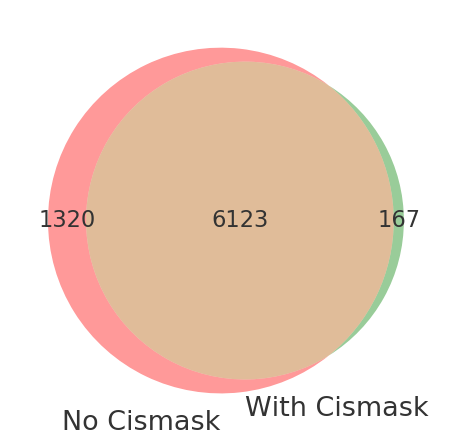

In [81]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

A = set(ld_nc_snps)
B = set(ld_snps)
AB = set.intersection(A, B)

numAb = len(A) - len(AB)
numaB = len(B) - len(AB)
numAB = len(AB)

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)

venn2(subsets = (numAb, numaB, numAB), set_labels = ('No Cismask', 'With Cismask'),
      ax=ax1)


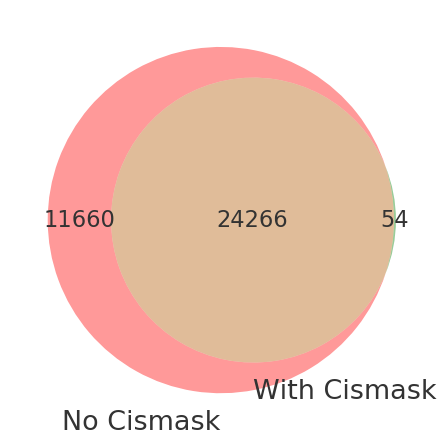

In [80]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

A = set(nc_snps)
B = set(snps)
AB = set.intersection(A, B)

numAb = len(A) - len(AB)
numaB = len(B) - len(AB)
numAB = len(AB)

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)

venn2(subsets = (numAb, numaB, numAB), set_labels = ('No Cismask', 'With Cismask'),
      ax=ax1)